In [3]:
#loading all required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
from sklearn import cluster, datasets, metrics
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
pd.set_option('float_format', '{:f}'.format)
from datetime import datetime, timedelta
%matplotlib inline
import seaborn as sns

In [4]:
episode= pd.read_csv("/content/episode.csv",na_values=" ")

In [5]:
episode.head()

,serial,strata,psu,pnum,daynum,HhOut,IndOut,DMFlag,IMonth,IYear,DVAge,DayNum_DiaryDay,DPday,DiaryDate_Act,DiaryDay_Act,DiaryDateDiff,dmonth,dyear,ddayw,DiaryType,WhenDiary,AfterDiaryDay,WhereStart,WhereEnd,RushedD,Ordinary,KindOfDay,Trip,dia_wt_a,dia_wt_b,epnum,tid,eptime,whatdoing,What_Oth1,What_Oth2,What_Oth3,WhereWhen,Device,WithAlone,WithSpouse,WithMother,WithFather,WithChild,WithOther,WithOtherYK,WithMiss,WithNA,Enjoy,impuflag
0,11011202,110,117,1,1,210,11,2,12,2014,48,1,12-11-2014,12-11-2014,5,0,12,2014,1,1,1,-1,1,1,2,2,3,1,2.021182,1.581180,1,1,110,110,-9,-9,-9.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000
1,11011202,110,117,1,1,210,11,2,12,2014,48,1,12-11-2014,12-11-2014,5,0,12,2014,1,1,1,-1,1,1,2,2,3,1,2.021182,1.581180,2,12,10,8219,111,-9,-9.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
2,11011202,110,117,1,1,210,11,2,12,2014,48,1,12-11-2014,12-11-2014,5,0,12,2014,1,1,1,-1,1,1,2,2,3,1,2.021182,1.581180,3,13,10,310,-9,-9,-9.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
3,11011202,110,117,1,1,210,11,2,12,2014,48,1,12-11-2014,12-11-2014,5,0,12,2014,1,1,1,-1,1,1,2,2,3,1,2.021182,1.581180,4,14,10,3210,-9,-9,-9.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
4,11011202,110,117,1,1,210,11,2,12,2014,48,1,12-11-2014,12-11-2014,5,0,12,2014,1,1,1,-1,1,1,2,2,3,1,2.021182,1.581180,5,15,10,3110,-9,-9,-9.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000


In [6]:
episode["WhereStart"].value_counts()

 1    5354
 2     450
-9     319
Name: WhereStart, dtype: int64

In [7]:
index_names = episode[ episode['WhereStart'] == -9 ].index
episode.drop(index_names, inplace = True)

In [8]:
episode["WhereStart"].value_counts()

1    5354
2     450
Name: WhereStart, dtype: int64

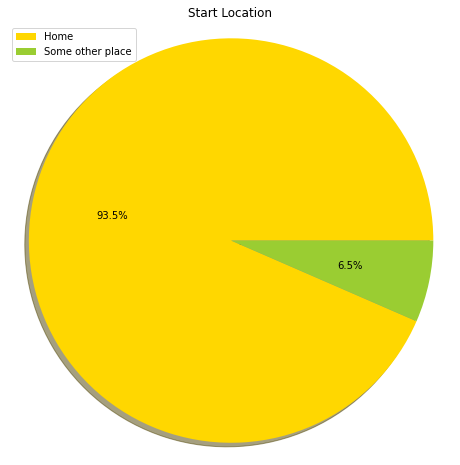

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
workstatus = [78644,5496]
colors_list = ['gold','yellowgreen']
my_labels = 'Home','Some other place'
plt.pie(workstatus,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Start Location', y=1.) 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()

In [10]:
episode["WhereEnd"].value_counts()

1    5402
2     402
Name: WhereEnd, dtype: int64

In [11]:
index_names = episode[ episode['WhereEnd'] == -9 ].index
episode.drop(index_names, inplace = True)

In [12]:
episode["WhereEnd"].value_counts()

1    5402
2     402
Name: WhereEnd, dtype: int64

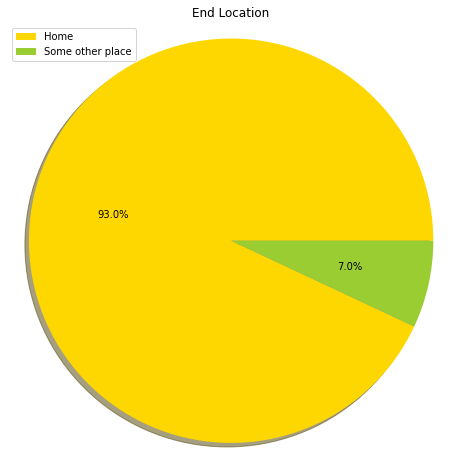

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
workstatus = [77589,5816]
colors_list = ['gold','yellowgreen']
my_labels = 'Home','Some other place'
plt.pie(workstatus,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('End Location', y=1.) 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()

In [14]:
episode["Ordinary"].value_counts()

1    4315
2    1489
Name: Ordinary, dtype: int64

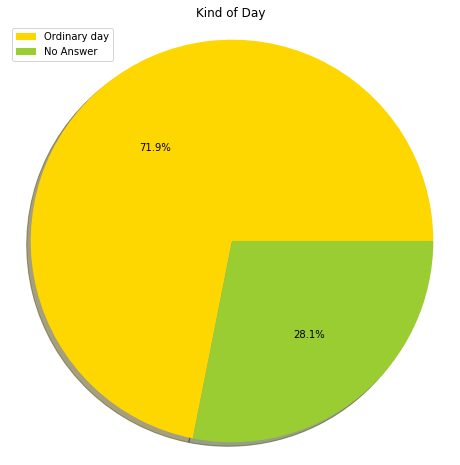

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
workstatus = [59410,23240]
colors_list = ['gold','yellowgreen']
my_labels = 'Ordinary day','No Answer'
plt.pie(workstatus,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Kind of Day', y=1.) 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()

In [16]:
episode["whatdoing"].value_counts().sort_values(ascending=False)

210     658
110     559
310     550
8210    477
3110    376
1110    235
111     135
9360    118
3130    110
9120    100
3819     92
3210     90
3240     86
9500     75
5140     70
7330     70
5120     69
5310     64
3310     60
7241     57
3610     55
8212     54
5190     49
3290     47
3410     45
9210     45
2120     42
2110     42
8110     41
5110     41
9960     40
8219     39
3611     37
3440     32
4320     31
3000     31
3430     31
7231     30
8120     30
3710     28
3830     26
9950     23
1120     23
3320     23
9990     22
7250     22
9000     22
9610     22
8100     22
7320     21
9380     21
9410     20
9370     19
9510     19
9230     18
3510     18
6110     17
3540     17
4210     16
3630     15
9940     15
1310     15
9520     14
4110     14
9390     13
6179     13
300      11
3330     11
9430     11
9970     11
3520     11
9310     11
1399     10
9620     10
8221     10
7170     10
4230     10
9130      9
5290      9
5295      9
7220      9
9600      9
3820      8
7259

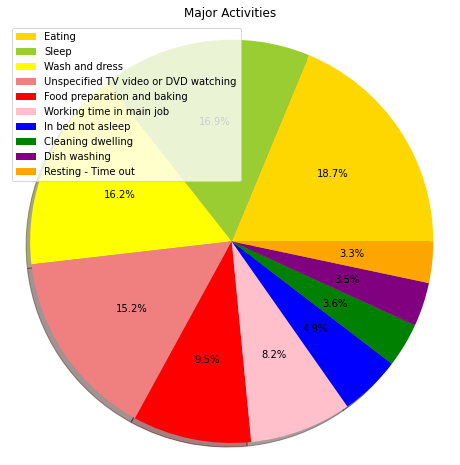

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
workstatus = [59708,53730,51643,48474,30283,26072,15557,11310,11190,10586]
colors_list = ['gold','yellowgreen','yellow', 'lightcoral','red','pink','blue','green','purple','orange']
my_labels = 'Eating','Sleep','Wash and dress','Unspecified TV video or DVD watching','Food preparation and baking','Working time in main job','In bed not asleep','Cleaning dwelling','Dish washing','Resting - Time out'
plt.pie(workstatus,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Major Activities', y=1.) 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()